In [21]:
%matplotlib inline
import torch
import numpy as np
import sys
sys.path.append('..')
import d2lzh_pytorch as d2l


In [22]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5

In [23]:
features = torch.randn((n_train + n_test), 1)
print(features.shape)

torch.Size([200, 1])


In [24]:
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1)
print(poly_features)

tensor([[ 7.2046e-01,  5.1906e-01,  3.7396e-01],
        [-1.4086e+00,  1.9841e+00, -2.7947e+00],
        [ 1.5267e+00,  2.3309e+00,  3.5587e+00],
        [-7.9203e-02,  6.2731e-03, -4.9684e-04],
        [ 6.8402e-02,  4.6788e-03,  3.2004e-04],
        [-6.9981e-01,  4.8974e-01, -3.4272e-01],
        [ 5.3085e-01,  2.8181e-01,  1.4960e-01],
        [-1.4285e+00,  2.0405e+00, -2.9148e+00],
        [ 2.7011e-01,  7.2958e-02,  1.9707e-02],
        [ 1.7796e+00,  3.1669e+00,  5.6357e+00],
        [ 9.5889e-01,  9.1947e-01,  8.8166e-01],
        [-5.5520e-01,  3.0824e-01, -1.7113e-01],
        [ 5.8549e-01,  3.4280e-01,  2.0071e-01],
        [ 2.6947e-01,  7.2616e-02,  1.9568e-02],
        [-4.1693e-01,  1.7383e-01, -7.2473e-02],
        [-5.2246e-01,  2.7297e-01, -1.4262e-01],
        [ 4.6085e-02,  2.1239e-03,  9.7878e-05],
        [ 9.0303e-01,  8.1547e-01,  7.3639e-01],
        [-1.5628e+00,  2.4423e+00, -3.8168e+00],
        [ 9.2514e-01,  8.5587e-01,  7.9180e-01],
        [-7.0448e-03

In [25]:
print(poly_features[:,2])

tensor([ 3.7396e-01, -2.7947e+00,  3.5587e+00, -4.9684e-04,  3.2004e-04,
        -3.4272e-01,  1.4960e-01, -2.9148e+00,  1.9707e-02,  5.6357e+00,
         8.8166e-01, -1.7113e-01,  2.0071e-01,  1.9568e-02, -7.2473e-02,
        -1.4262e-01,  9.7878e-05,  7.3639e-01, -3.8168e+00,  7.9180e-01,
        -3.4963e-07,  2.3811e-01, -1.5406e-06,  1.1125e-01,  4.8034e-05,
         2.4583e-03, -4.1713e-01,  6.5529e+00,  4.0752e-03, -5.9852e+00,
         1.0202e+01, -3.3351e-05, -1.4573e-01, -1.6833e-01, -4.9630e+00,
         2.0651e-02,  1.3349e-01,  1.5426e-02,  6.7888e-03,  2.5729e-03,
        -4.3880e-02, -2.1542e-01,  9.2367e-01,  6.6476e-02, -1.3689e+01,
         7.3636e-01, -2.3578e-01, -3.2932e-06,  1.9579e+00,  1.5579e-01,
         6.0150e-04, -3.1460e-01,  7.0080e-02,  6.1336e-01,  1.0287e-01,
         8.4222e-01, -1.4791e+00, -4.2300e-01,  2.3413e-02,  1.6456e+00,
         7.5534e-01,  6.6213e-02,  4.3492e-01,  2.5515e+00,  1.7434e-01,
         2.2869e+01, -3.1844e-02,  3.2267e+00,  2.2

In [26]:
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]
    + true_w[2] * poly_features[:, 2] + true_b)

In [27]:
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),dtype=torch.float)

In [28]:
features[:2], poly_features[:2], labels[:2]

(tensor([[ 0.7205],
         [-1.4086]]),
 tensor([[ 0.7205,  0.5191,  0.3740],
         [-1.4086,  1.9841, -2.7947]]),
 tensor([  6.1998, -19.0992]))

In [29]:
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,legend=None,figsize=(3.5, 2.5)):
    d2l.set_figsize(figsize)
    d2l.plt.xlabel(x_label)
    d2l.plt.ylabel(y_label)
    d2l.plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        d2l.plt.semilogy(x2_vals, y2_vals, linestyle=':')
        d2l.plt.legend(legend)


In [30]:
num_epochs, loss = 100, torch.nn.MSELoss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
        net = torch.nn.Linear(train_features.shape[-1],1)
        
        batch_size = min(10, train_features.shape[0])
        dataset = torch.utils.data.TensorDataset(train_features, train_labels)
        train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
        
        optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
        train_ls, test_ls =[], []
        for _ in range(num_epochs):
            for X, y in train_iter:
                l =loss(net(X), y.view(-1, 1))
                optimizer.zero_grad()
                l.backward()
                optimizer.step()
            train_labels = train_labels.view(-1, 1)
            test_labels = test_labels.view(-1, 1)
            train_ls.append(loss(net(train_features), train_labels).item())
            test_ls.append(loss(net(test_features), test_labels).item())
        print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
        semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss', 
                range(1, num_epochs + 1), test_ls, ['trian', 'test'])
        print('weight:', net.weight.data,
             '\nbias:', net.bias.data)

final epoch: train loss 9.730116289574653e-05 test loss 8.447250002063811e-05
weight: tensor([[ 1.2031, -3.4006,  5.5996]]) 
bias: tensor([5.0014])


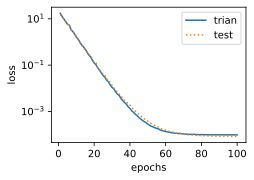

In [31]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:,:],
            labels[:n_train], labels[n_train:])

final epoch: train loss 203.8574676513672 test loss 295.28729248046875
weight: tensor([[19.9956]]) 
bias: tensor([1.0504])


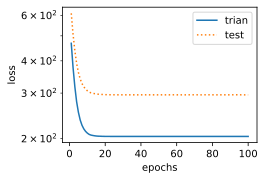

In [32]:
fit_and_plot(features[:n_train,:], features[n_train:, :], labels[:n_train], labels[n_train:])

final epoch: train loss 0.7817100286483765 test loss 5.567174911499023
weight: tensor([[ 2.2741, -2.5781,  5.0917]]) 
bias: tensor([3.8422])


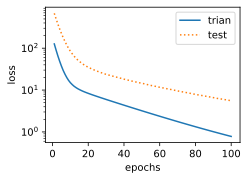

In [36]:
fit_and_plot(poly_features[0:20, :], poly_features[n_train:, :], labels[0:20],labels[n_train:])